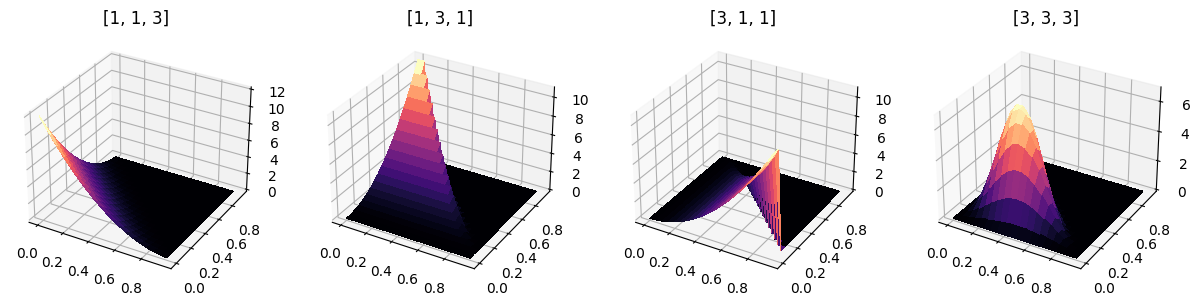

In [86]:
from scipy.special import gamma

def dirichlet(x, y, alphas, logscale=False):
    assert x.shape == y.shape, 'different axis shape'
    axis_shape = x.shape
    z = np.zeros(x.shape)
    
    a1, a2, a3 = alphas
    nc = gamma(alphas.sum()) / np.prod([ gamma(alphas) ])
    
    for i in range(axis_shape[0]):
        for j in range(axis_shape[1]):
            px = x[i, j]
            py = y[i, j]
            if (px + py > 1.) or (px +  py < 0): continue
            pz = 1 - px - py
            prob = nc * (px ** (a1 - 1)) * (py ** (a2 - 1)) * (pz ** (a3 - 1))            
            z[i, j] = prob if not logscale else np.log(prob)
    return z
    
    
x, y = np.mgrid[ 0:1:0.05, 0:1:0.05 ]

#fig, ax = plt.subplots(nrows=3, projection='3d')
fig = plt.figure(figsize=(15, 7))
ax = [ 
    fig.add_subplot(141, projection='3d'),
    fig.add_subplot(142, projection='3d'),
    fig.add_subplot(143, projection='3d'),
    fig.add_subplot(144, projection='3d'),
]

alphas = [
    [1, 1, 3], 
    [1, 3, 1], 
    [3, 1, 1], 
    [3, 3, 3]
]

for i in range(len(alphas)):
    z = dirichlet(x, y, np.array(alphas[i]))
    #ax = plt.axes(projection ='3d') 
    ax[i].title.set_text(alphas[i])
    surf = ax[i].plot_surface(x, y, z, 
                           cmap='magma', 
                           edgecolor='none', 
                           rstride=1, 
                           cstride=1,
                           linewidth=0, 
                           antialiased=False, 
                           shade=False)
plt.show()